# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [53]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [2]:
# your code here
employees = pd.read_csv('/Users/maxime/IronHack/DAFT_NOV_21_01-main/module_2/Lab_5_ Pivot_Tables_and_Crosstab/Employee.csv')

In [24]:
employees.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [11]:
# Method 1: without pivot tables
employees[['Department','Salary']].groupby(['Department']).agg({'Salary':'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [9]:
# Method 1.2
employees.groupby(['Department'])['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [12]:
# Method 2: with pivot table
employees.pivot_table(index=["Department"], values=["Salary"], aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [13]:
# your code here
employees.pivot_table(index=["Department",'Title'], values=["Salary"], aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [18]:
# your code here
employees.pivot_table(index=["Title"], values=["Salary"], columns=['Years'])

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [20]:
# your code here
employees.pivot_table(index=["Department","Title"], values=["Salary",'Name'], aggfunc={'Salary':np.mean,'Name':'count'})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [22]:
# your code here
employees.pivot_table(index=["Department","Title"], values=["Salary"], aggfunc={'Salary':[np.median,min,max]})

Salary             
                        max median   min
Department Title                        
HR         VP          70.0   70.0  70.0
           analyst     35.0   32.5  30.0
IT         VP          70.0   70.0  70.0
           analyst     35.0   32.5  30.0
           associate   60.0   60.0  60.0
Sales      associate   55.0   55.0  55.0

In [ ]:
"""
not enough observations to study the distribution
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your code here


#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [26]:
# your code here
employees.pivot_table(index=["Department"], values=["Salary","Name"], aggfunc={'Salary':np.sum, 'Name':'count'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [28]:
# your code here
employees.pivot_table(index=["Department","Title"], values=["Salary","Years"], aggfunc={'Salary':np.mean, 'Years':np.sum})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [29]:
# your code here
fitbit = pd.read_csv("/Users/maxime/IronHack/DAFT_NOV_21_01-main/module_2/Lab_5_ Pivot_Tables_and_Crosstab/Fitbit.csv")

In [31]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [34]:
# your code here
fitbit.shape

(367, 14)

In [35]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [36]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# your code here
fitbit[['Steps','Minutes Very Active']

In [40]:
# your code here
fitbit[['Steps','Minutes Very Active']].corr(method='pearson')

,Steps,Minutes Very Active
Steps,1.000000,0.571452
Minutes Very Active,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [43]:
import matplotlib.pyplot as plt;


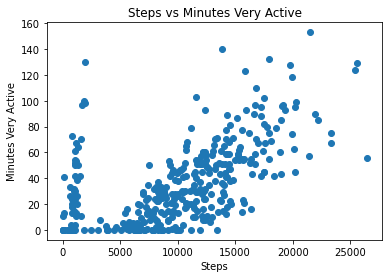

In [44]:
a = fitbit['Steps'] 
b = fitbit['Minutes Very Active']
plt.scatter(a,b)
plt.title('Steps vs Minutes Very Active')
plt.xlabel('Steps')
plt.ylabel('Minutes Very Active')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
weclearly see 2 trend lines, one of them represent a clear positive correlation between the 2 varaibles"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [45]:
# your code here
fitbit[['Steps','Minutes Sedentary']].corr(method='pearson')

,Steps,Minutes Sedentary
Steps,1.000000,0.076906
Minutes Sedentary,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

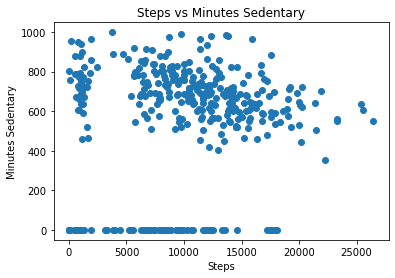

In [46]:
# your code here
a = fitbit['Steps'] 
b = fitbit['Minutes Sedentary']
plt.scatter(a,b)
plt.title('Steps vs Minutes Sedentary')
plt.xlabel('Steps')
plt.ylabel('Minutes Sedentary')
plt.show()

In [ ]:
"""
We can identify 3 clusters but no clear correlation between the 2 variables
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [47]:
# your code here
fitbit[['Steps','MinutesOfSleep']].corr(method='pearson')

,Steps,MinutesOfSleep
Steps,1.000000,0.130986
MinutesOfSleep,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

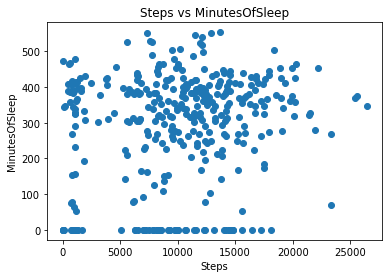

In [48]:
# your code here
a = fitbit['Steps'] 
b = fitbit['MinutesOfSleep']
plt.scatter(a,b)
plt.title('Steps vs MinutesOfSleep')
plt.xlabel('Steps')
plt.ylabel('MinutesOfSleep')
plt.show()

In [ ]:
"""
we can see missing values and no particular
"""

In [49]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

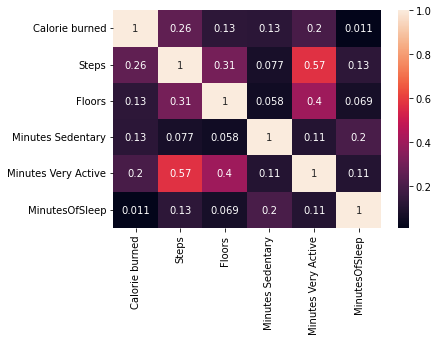

In [54]:
# your code here
cor_fit = fitbit[columns].corr()
sns.heatmap(cor_fit, annot=True)
plt.show()

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [58]:
# your code here
cor_fit['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [59]:
# your code here
time_grades = pd.read_csv('/Users/maxime/IronHack/DAFT_NOV_21_01-main/module_2/Lab_5_ Pivot_Tables_and_Crosstab/Time_Grades.csv')

In [69]:
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

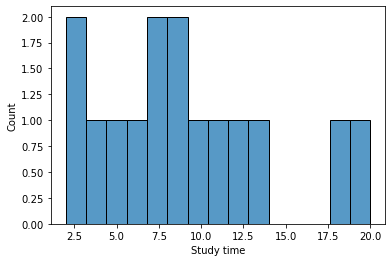

In [74]:
# your code here
sns.histplot(data=time_grades['Study time'], bins=15)
plt.show()

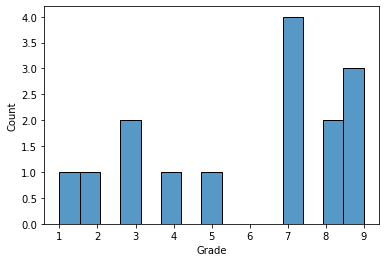

In [75]:
sns.histplot(data=time_grades['Grade'], bins=15)
plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [76]:
# your code here
time_grades[['Grade','Study time']].corr(method='pearson')

,Grade,Study time
Grade,1.000000,0.798046
Study time,0.798046,1.000000


In [77]:
time_grades[['Grade','Study time']].corr(method='spearman')

,Grade,Study time
Grade,1.000000,0.819659
Study time,0.819659,1.000000


In [ ]:
"""
the pearson correlation is 0.80 so it is strongly correlated,
the spearman correlation shows a strong correlation as well with 0.82"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

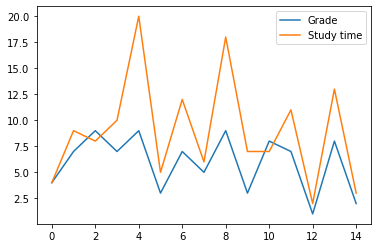

In [79]:
# your code here
time_grades[['Grade','Study time']].plot()
plt.legend()
plt.show()

In [ ]:
"""
we can visualize that the chart lines follow the same pattern. The grade variable however seems to have a lower variance
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
the data is not monotonic so the spearman correlation is higher"""